# --- --- --- --- --- --- --- --- --- --- --- ---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

# import xgboost as xgb
# from sklearn.metrics import r2_score

from statsmodels.graphics.mosaicplot import mosaic


pd.options.mode.chained_assignment = None

# --- --- --- --- --- --- --- --- --- --- --- ---

Import raw data into a pandas dataframe

In [2]:
rawData = pd.read_csv('heart_attack-400k.csv')

# --- --- --- --- --- --- --- --- --- --- --- ---

Take a look at how the data are structured, one thing that pops out is there are missing entries for a lot of columns

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              400000 non-null  object 
 1   Ethnicity           387413 non-null  object 
 2   Location            400000 non-null  object 
 3   Age                 391839 non-null  object 
 4   Height              374358 non-null  float64
 5   Weight              362274 non-null  float64
 6   BMI                 356239 non-null  float64
 7   Sleep               395122 non-null  float64
 8   Health              398930 non-null  object 
 9   PoorPhysical        390172 non-null  float64
 10  PoorMental          391854 non-null  float64
 11  LastCheckup         392521 non-null  float64
 12  Tetanus             325985 non-null  object 
 13  TeethRemoved        389764 non-null  object 
 14  Smoker              368240 non-null  object 
 15  ECigarette          368060 non-nul

# --- --- --- --- --- --- --- --- --- --- --- ---

Check how the data are strucutred by looking at the number of values in each column, a quick look at the columns, and a histogram for each for exploratory data analysis. Would normally prefer to do this in a different software package.

In [4]:
def drawHistorgram(s):
    plt.figure(figsize=(8,8))
    plt.hist(s.astype('str'), orientation='horizontal')
    plt.show()

Gender


Gender
Female    212030
Male      187970
Name: count, dtype: int64

0           Male
1           Male
2           Male
3         Female
4         Female
           ...  
399995      Male
399996    Female
399997      Male
399998    Female
399999    Female
Name: Gender, Length: 400000, dtype: object

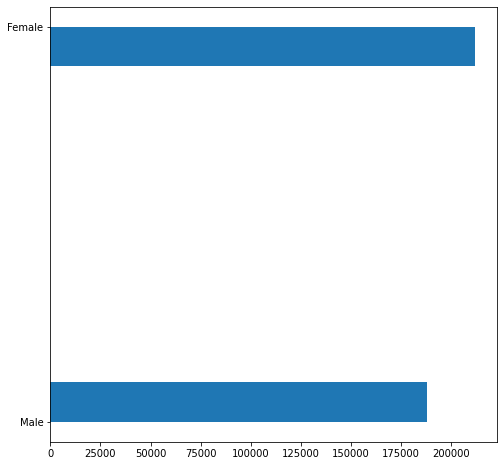

Ethnicity


Ethnicity
White only, Non-Hispanic         287974
Hispanic                          38485
Black only, Non-Hispanic          31849
Other race only, Non-Hispanic     20480
Multiracial, Non-Hispanic          8625
Name: count, dtype: int64

0              White only, Non-Hispanic
1              White only, Non-Hispanic
2              White only, Non-Hispanic
3              White only, Non-Hispanic
4              White only, Non-Hispanic
                      ...              
399995         White only, Non-Hispanic
399996         White only, Non-Hispanic
399997                         Hispanic
399998    Other race only, Non-Hispanic
399999         White only, Non-Hispanic
Name: Ethnicity, Length: 400000, dtype: object

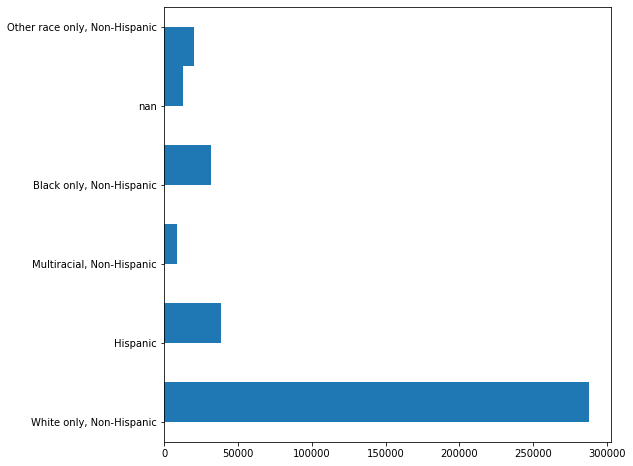

Location


Location
Washington              23528
New York                16017
Minnesota               15057
Ohio                    14833
Maryland                14779
Texas                   12750
Florida                 12034
Wisconsin               10171
Kansas                  10111
Massachusetts            9909
California               9835
Maine                    9541
Indiana                  9380
Virginia                 9348
Arizona                  9165
Michigan                 9067
South Carolina           8992
Utah                     8845
Connecticut              8763
Colorado                 8387
Georgia                  8315
Iowa                     8042
Vermont                  7886
New Jersey               7336
Hawaii                   7002
Nebraska                 6730
Missouri                 6711
South Dakota             6647
Montana                  6339
New Hampshire            6091
Idaho                    5646
Rhode Island             5359
Alaska                   5267
O

0           Washington
1            Tennessee
2             Virginia
3         Rhode Island
4             Maryland
              ...     
399995         Vermont
399996         Arizona
399997        New York
399998        Colorado
399999      Washington
Name: Location, Length: 400000, dtype: object

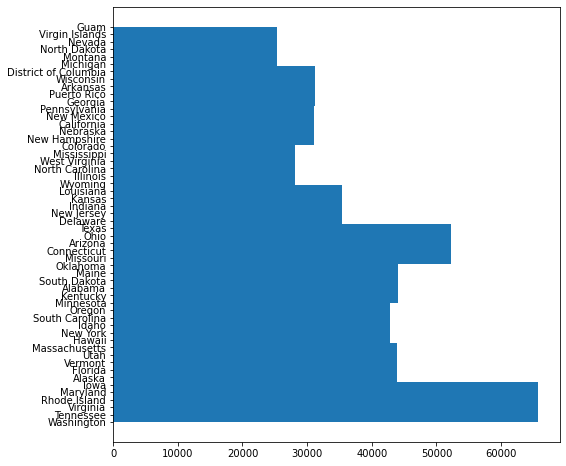

Age


Age
65 to 69       42231
60 to 64       40017
70 to 74       39076
55 to 59       33060
80 or older    32564
50 to 54       30185
75 to 79       29308
40 to 44       26892
35 to 39       25769
45 to 49       25641
18 to 24       24158
30 to 34       23197
25 to 29       19741
Name: count, dtype: int64

0            35 to 39
1            55 to 59
2            65 to 69
3         80 or older
4            60 to 64
             ...     
399995       60 to 64
399996       75 to 79
399997       18 to 24
399998       55 to 59
399999       65 to 69
Name: Age, Length: 400000, dtype: object

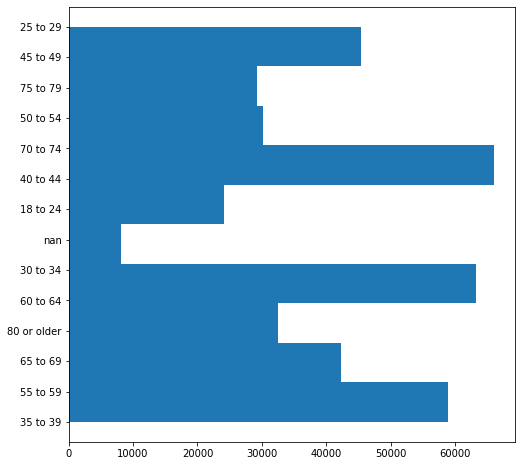

Height


Height
1.68    33149
1.63    32042
1.70    30558
1.65    29573
1.78    28693
        ...  
1.16        1
2.36        1
2.02        1
0.99        1
2.07        1
Name: count, Length: 108, dtype: int64

0         1.52
1         1.78
2          NaN
3         1.60
4         1.75
          ... 
399995    1.68
399996    1.73
399997    1.83
399998    1.57
399999    1.70
Name: Height, Length: 400000, dtype: float64

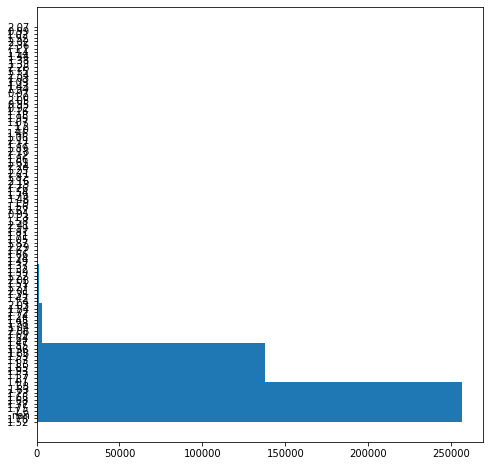

Weight


Weight
90.72     19152
81.65     17651
68.04     15833
72.57     15441
77.11     14342
          ...  
200.49        1
223.17        1
23.13         1
212.73        1
182.80        1
Name: count, Length: 595, dtype: int64

0         53.52
1         81.65
2         68.04
3         54.43
4         92.99
          ...  
399995    70.31
399996    63.50
399997    70.31
399998    64.41
399999      NaN
Name: Weight, Length: 400000, dtype: float64

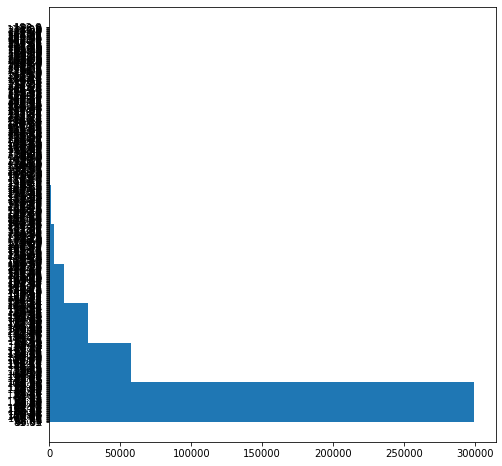

BMI


BMI
26.63    3823
27.46    2926
24.41    2886
27.44    2828
27.12    2823
         ... 
83.22       1
13.41       1
30.39       1
41.58       1
44.03       1
Name: count, Length: 3897, dtype: int64

0         23.05
1         25.83
2           NaN
3         21.26
4         30.27
          ...  
399995    25.02
399996    21.29
399997    21.02
399998    25.97
399999      NaN
Name: BMI, Length: 400000, dtype: float64

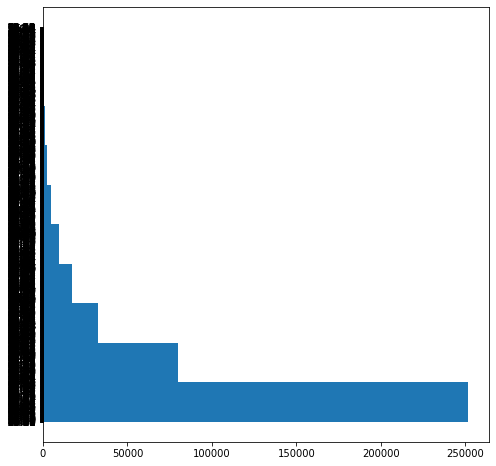

Sleep


Sleep
7.0     119394
8.0     112858
6.0      86186
5.0      27065
9.0      19052
4.0      11158
10.0      9360
3.0       2926
12.0      2708
2.0       1392
1.0       1037
11.0       598
16.0       295
15.0       280
14.0       262
13.0       153
18.0       149
20.0       132
24.0        48
17.0        21
23.0        17
19.0        14
22.0        14
21.0         3
Name: count, dtype: int64

0          8.0
1          6.0
2          6.0
3          6.0
4          7.0
          ... 
399995     6.0
399996     7.0
399997     7.0
399998    16.0
399999     9.0
Name: Sleep, Length: 400000, dtype: float64

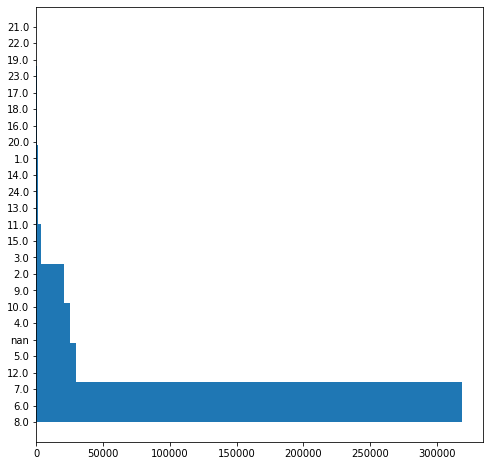

Health


Health
Very good    133509
Good         128949
Excellent     64612
Fair          54203
Poor          17657
Name: count, dtype: int64

0         Very good
1              Good
2              Good
3              Fair
4         Very good
            ...    
399995    Excellent
399996         Good
399997    Excellent
399998    Excellent
399999    Very good
Name: Health, Length: 400000, dtype: object

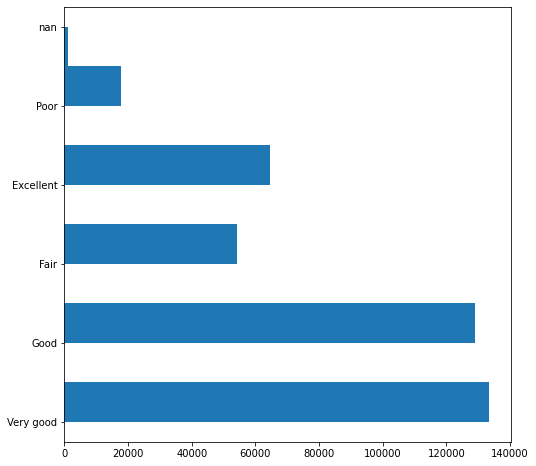

PoorPhysical


PoorPhysical
0.0     240634
30.0     29667
2.0      22733
1.0      15540
3.0      14322
5.0      13772
10.0      9513
7.0       8395
15.0      7890
4.0       7624
20.0      4876
14.0      4581
6.0       2283
25.0      1959
8.0       1575
12.0       992
21.0       919
28.0       670
9.0        366
29.0       326
18.0       240
16.0       225
27.0       168
17.0       164
13.0       146
11.0       138
22.0       122
24.0       104
26.0       101
23.0        85
19.0        42
Name: count, dtype: int64

0          0.0
1          3.0
2         10.0
3          0.0
4          0.0
          ... 
399995    14.0
399996     0.0
399997     0.0
399998     0.0
399999     0.0
Name: PoorPhysical, Length: 400000, dtype: float64

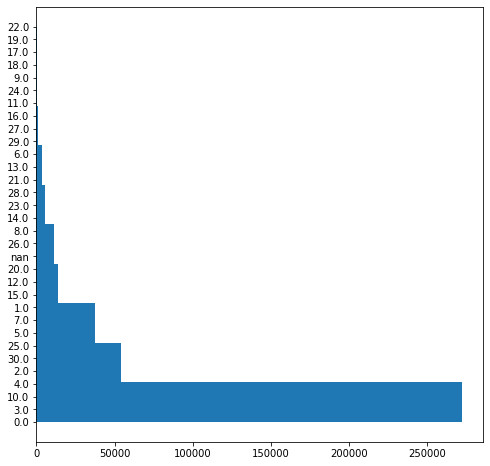

PoorMental


PoorMental
0.0     238364
30.0     24260
2.0      21347
5.0      17951
10.0     13860
3.0      13847
15.0     13096
1.0      12944
20.0      8183
4.0       7097
7.0       7061
25.0      2780
14.0      2567
6.0       2042
8.0       1549
12.0      1122
28.0       799
21.0       497
29.0       448
9.0        298
18.0       289
16.0       248
17.0       218
27.0       213
22.0       174
13.0       153
24.0       109
11.0       106
26.0       100
23.0        88
19.0        44
Name: count, dtype: int64

0          0.0
1         20.0
2         30.0
3          0.0
4          1.0
          ... 
399995     0.0
399996     0.0
399997     0.0
399998     0.0
399999     0.0
Name: PoorMental, Length: 400000, dtype: float64

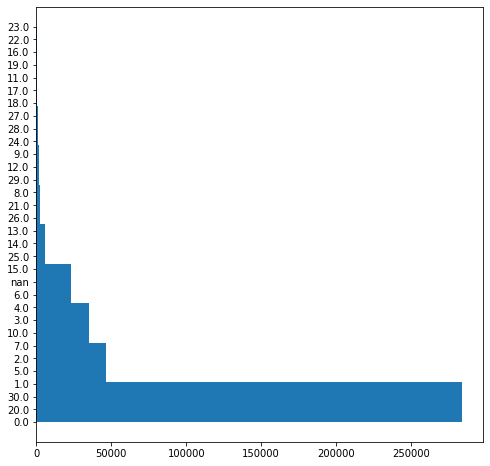

LastCheckup


LastCheckup
1.0     315397
2.0      37656
5.0      22243
10.0     17225
Name: count, dtype: int64

0          1.0
1          2.0
2          1.0
3          1.0
4          1.0
          ... 
399995    10.0
399996     1.0
399997     1.0
399998    10.0
399999     1.0
Name: LastCheckup, Length: 400000, dtype: float64

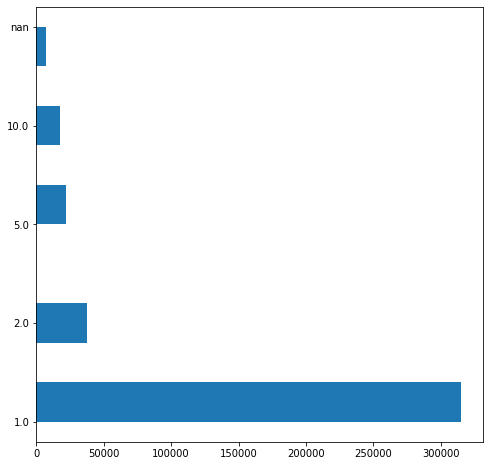

Tetanus


Tetanus
No               109248
Yes              102162
Yes, Tdap         89854
Yes, not Tdap     24721
Name: count, dtype: int64

0                    No
1                    No
2                   NaN
3                   NaN
4         Yes, not Tdap
              ...      
399995              Yes
399996              Yes
399997              Yes
399998               No
399999        Yes, Tdap
Name: Tetanus, Length: 400000, dtype: object

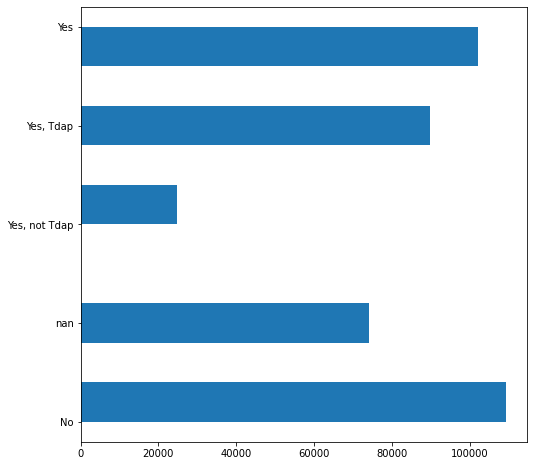

TeethRemoved


TeethRemoved
0      209704
1-5    116266
5+      40858
All     22936
Name: count, dtype: int64

0         All
1           0
2           0
3           0
4           0
         ... 
399995    NaN
399996     5+
399997      0
399998      0
399999      0
Name: TeethRemoved, Length: 400000, dtype: object

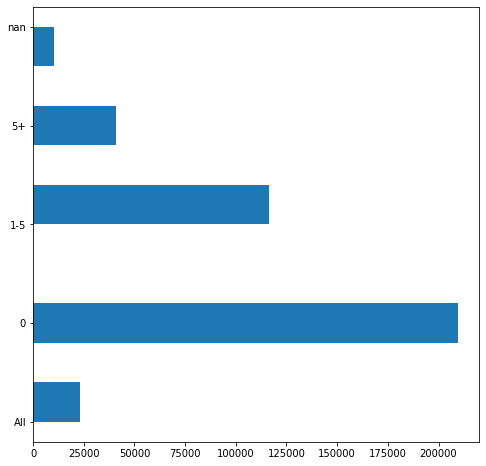

Smoker


Smoker
Never         221245
Quit          102143
Daily          32362
Occasional     12490
Name: count, dtype: int64

0         Never
1         Never
2           NaN
3           NaN
4         Never
          ...  
399995    Never
399996    Never
399997    Never
399998    Never
399999    Never
Name: Smoker, Length: 400000, dtype: object

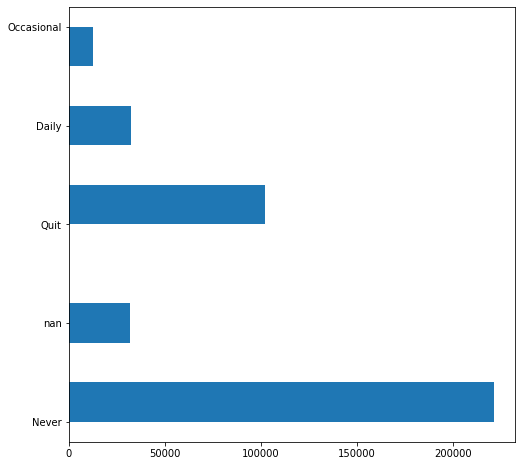

ECigarette


ECigarette
Never            280434
Not currently     67721
Occasional        10546
Daily              9359
Name: count, dtype: int64

0                 Never
1                 Never
2                   NaN
3                   NaN
4                 Never
              ...      
399995            Never
399996            Never
399997    Not currently
399998            Never
399999            Never
Name: ECigarette, Length: 400000, dtype: object

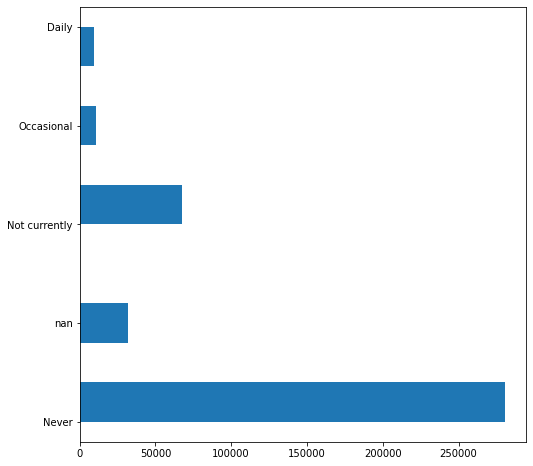

Diabetes


Diabetes
No                     331345
Yes                     54947
No, borderline           9298
OnlyDuringPregnancy      3443
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: Diabetes, Length: 400000, dtype: object

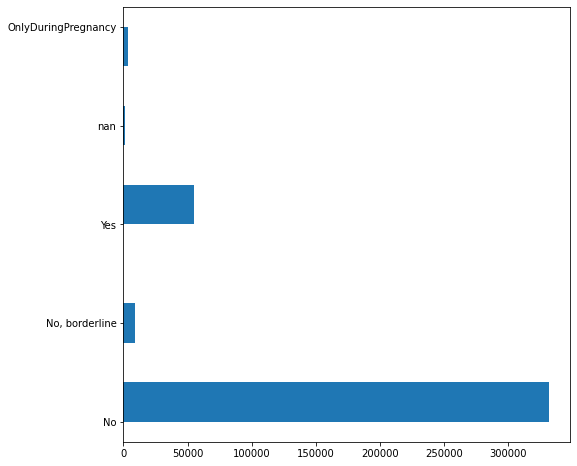

Covid


Covid
No                  242783
Yes                  99642
Yes, home-tested     12085
Name: count, dtype: int64

0          No
1         Yes
2         NaN
3         NaN
4          No
         ... 
399995     No
399996     No
399997    Yes
399998     No
399999     No
Name: Covid, Length: 400000, dtype: object

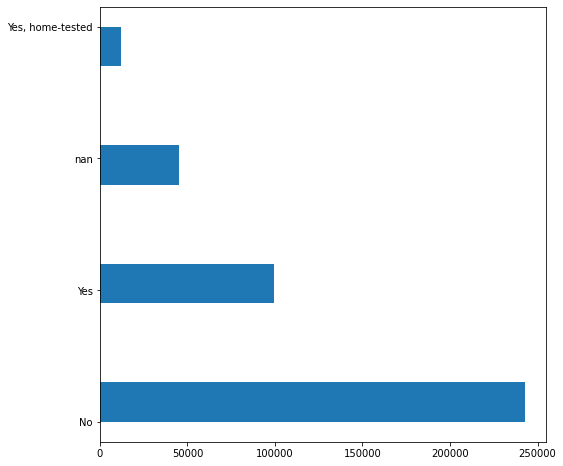

ActiveBool


ActiveBool
Yes    303294
No      95717
Name: count, dtype: int64

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
399995    Yes
399996    Yes
399997    Yes
399998    Yes
399999     No
Name: ActiveBool, Length: 400000, dtype: object

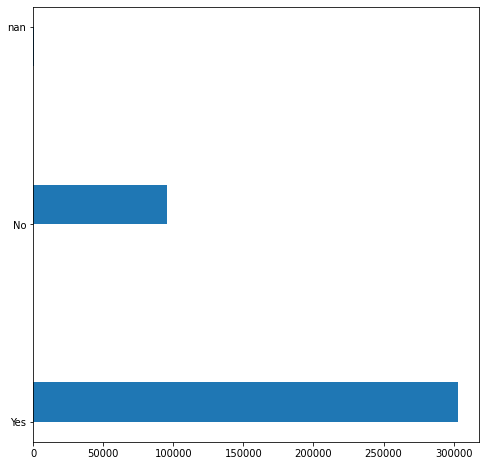

AlcoholBool


AlcoholBool
Yes    189402
No     168828
Name: count, dtype: int64

0          No
1          No
2         NaN
3         NaN
4         Yes
         ... 
399995    Yes
399996     No
399997    Yes
399998     No
399999     No
Name: AlcoholBool, Length: 400000, dtype: object

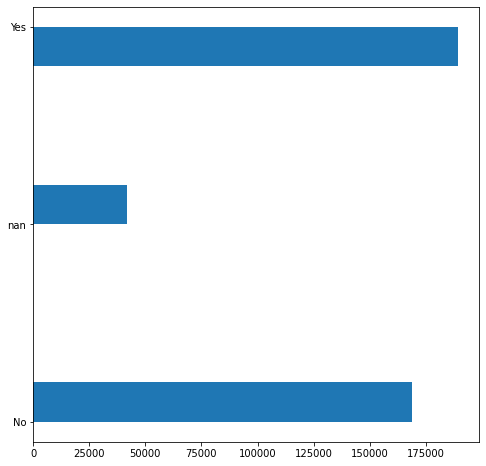

AnginaBool


AnginaBool
No     372246
Yes     23831
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: AnginaBool, Length: 400000, dtype: object

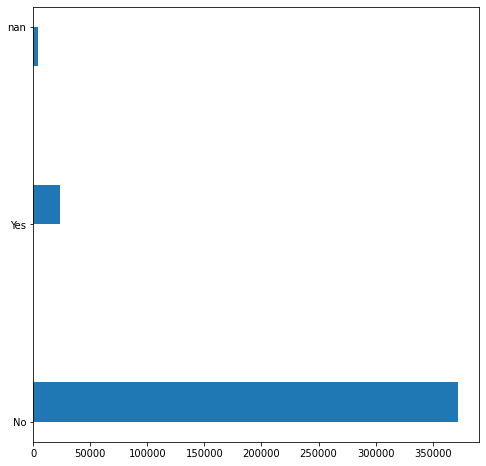

ArthritisBool


ArthritisBool
No     261890
Yes    135778
Name: count, dtype: int64

0          No
1          No
2         Yes
3         Yes
4         NaN
         ... 
399995    Yes
399996    Yes
399997     No
399998     No
399999     No
Name: ArthritisBool, Length: 400000, dtype: object

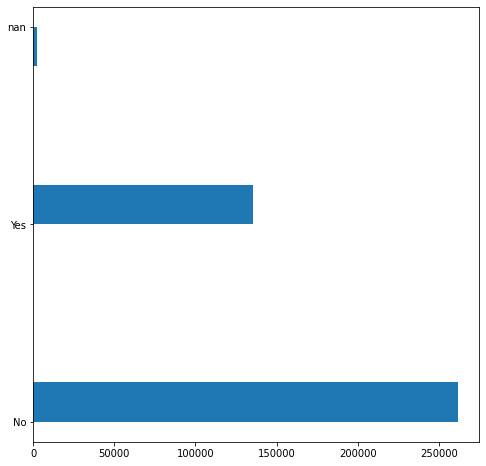

AsthmaBool


AsthmaBool
No     338463
Yes     59965
Name: count, dtype: int64

0          No
1          No
2          No
3         Yes
4          No
         ... 
399995    Yes
399996     No
399997     No
399998     No
399999     No
Name: AsthmaBool, Length: 400000, dtype: object

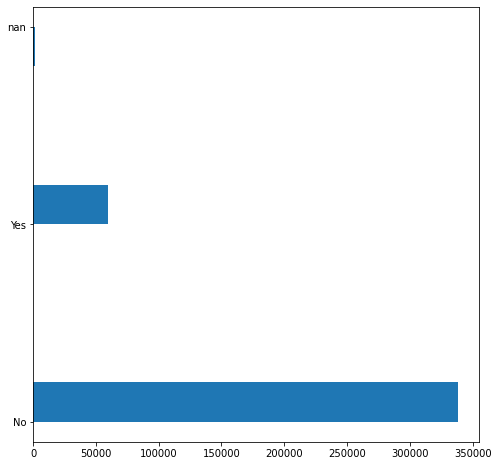

ChestScanBool


ChestScanBool
No     200673
Yes    149102
Name: count, dtype: int64

0          No
1         Yes
2         NaN
3         NaN
4          No
         ... 
399995    Yes
399996    Yes
399997     No
399998    Yes
399999     No
Name: ChestScanBool, Length: 400000, dtype: object

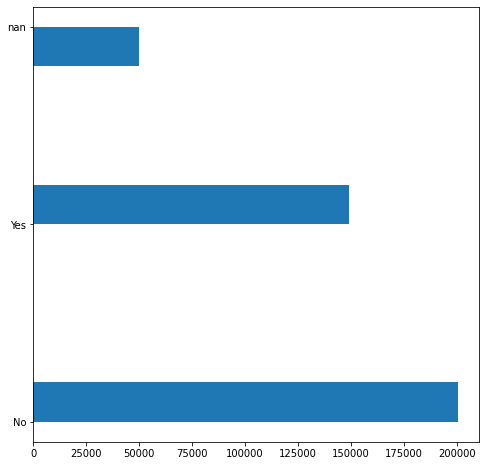

CopdBool


CopdBool
No     366101
Yes     31917
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: CopdBool, Length: 400000, dtype: object

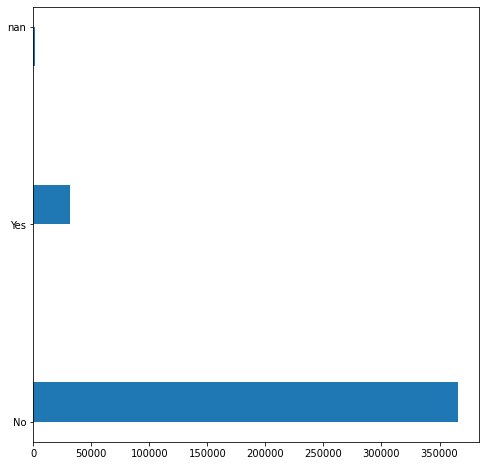

DepressionBool


DepressionBool
No     315413
Yes     82070
Name: count, dtype: int64

0          No
1          No
2         Yes
3          No
4          No
         ... 
399995     No
399996     No
399997    Yes
399998     No
399999     No
Name: DepressionBool, Length: 400000, dtype: object

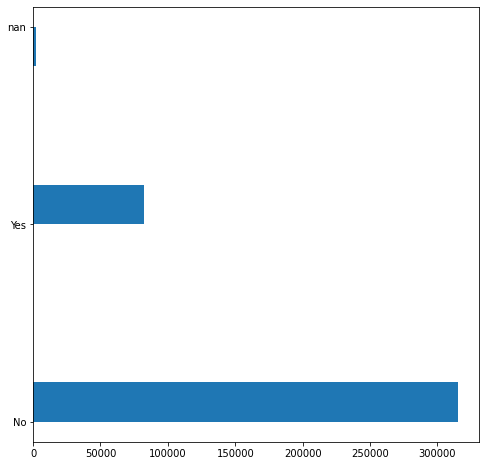

DiffConcentratBool


DiffConcentratBool
No     333272
Yes     45014
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: DiffConcentratBool, Length: 400000, dtype: object

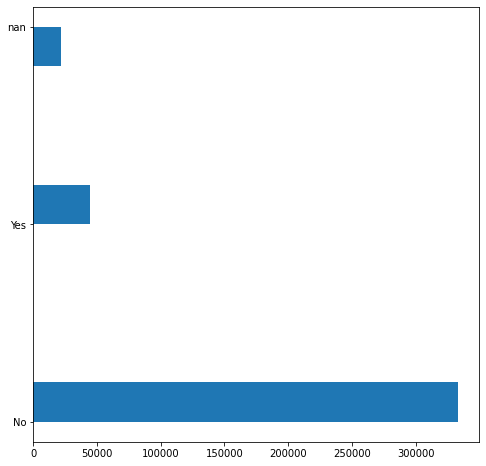

DiffDressingBool


DiffDressingBool
No     363464
Yes     15110
Name: count, dtype: int64

0          No
1          No
2         Yes
3          No
4          No
         ... 
399995     No
399996     No
399997     No
399998     No
399999     No
Name: DiffDressingBool, Length: 400000, dtype: object

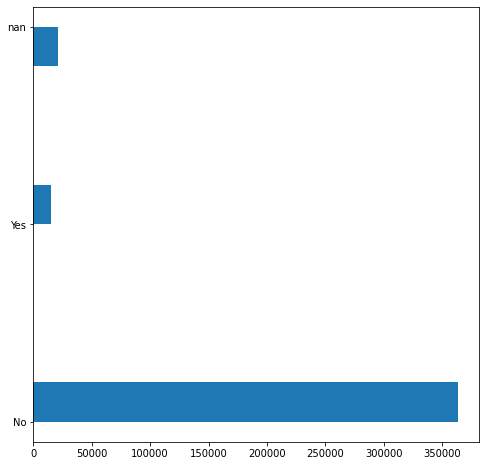

DiffErrandsBool


DiffErrandsBool
No     347957
Yes     29069
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: DiffErrandsBool, Length: 400000, dtype: object

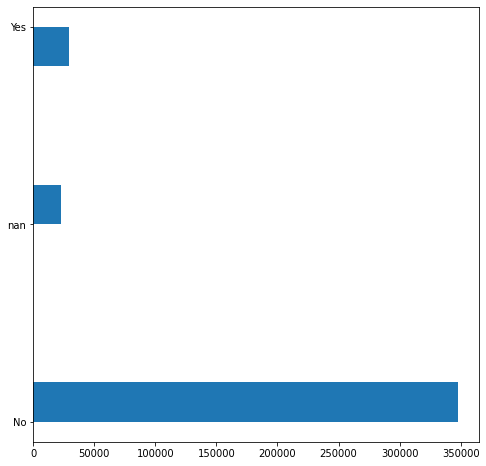

DiffWalkingBool


DiffWalkingBool
No     317286
Yes     61186
Name: count, dtype: int64

0          No
1          No
2         Yes
3          No
4          No
         ... 
399995     No
399996     No
399997     No
399998     No
399999     No
Name: DiffWalkingBool, Length: 400000, dtype: object

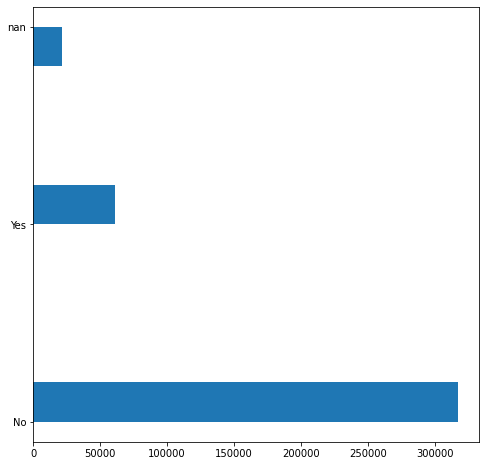

FluVaxBool


FluVaxBool
Yes    188018
No     169749
Name: count, dtype: int64

0         Yes
1          No
2         NaN
3         NaN
4         Yes
         ... 
399995     No
399996     No
399997    NaN
399998     No
399999    Yes
Name: FluVaxBool, Length: 400000, dtype: object

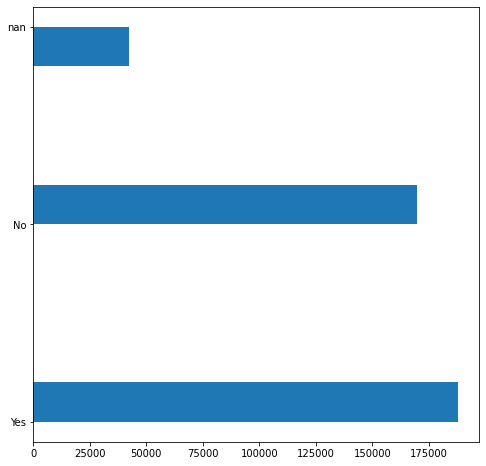

HardOfHearingBool


HardOfHearingBool
No     346574
Yes     34936
Name: count, dtype: int64

0          No
1          No
2          No
3         Yes
4          No
         ... 
399995     No
399996     No
399997     No
399998     No
399999     No
Name: HardOfHearingBool, Length: 400000, dtype: object

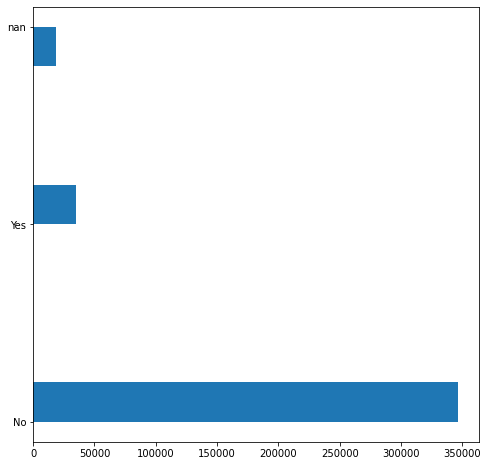

HeartAttackBool


HeartAttackBool
No     374722
Yes     22542
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: HeartAttackBool, Length: 400000, dtype: object

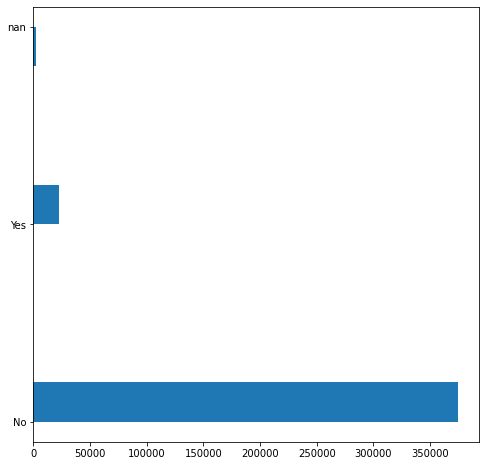

HivRiskBool


HivRiskBool
No     339216
Yes     15429
Name: count, dtype: int64

0          No
1          No
2         NaN
3         NaN
4          No
         ... 
399995     No
399996     No
399997     No
399998     No
399999     No
Name: HivRiskBool, Length: 400000, dtype: object

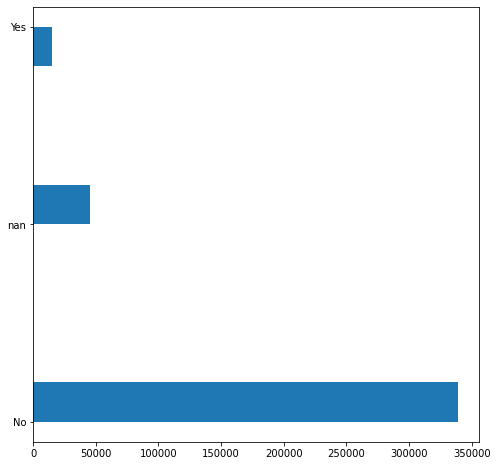

HivTestedBool


HivTestedBool
No     224779
Yes    115900
Name: count, dtype: int64

0          No
1         NaN
2         NaN
3         NaN
4         Yes
         ... 
399995    Yes
399996     No
399997     No
399998     No
399999     No
Name: HivTestedBool, Length: 400000, dtype: object

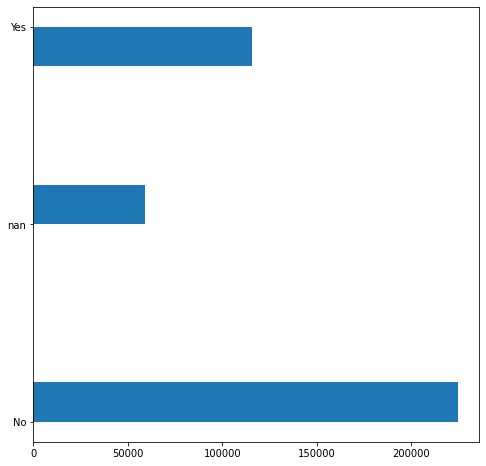

ImpairedVisionBool


ImpairedVisionBool
No     359419
Yes     21237
Name: count, dtype: int64

0         Yes
1          No
2          No
3          No
4          No
         ... 
399995     No
399996     No
399997     No
399998    Yes
399999     No
Name: ImpairedVisionBool, Length: 400000, dtype: object

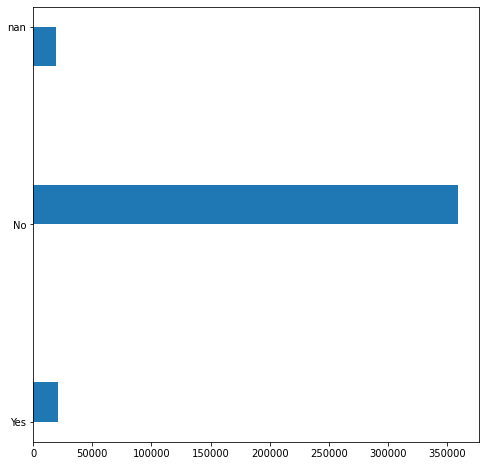

KidneyDiseaseBool


KidneyDiseaseBool
No     380026
Yes     18240
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: KidneyDiseaseBool, Length: 400000, dtype: object

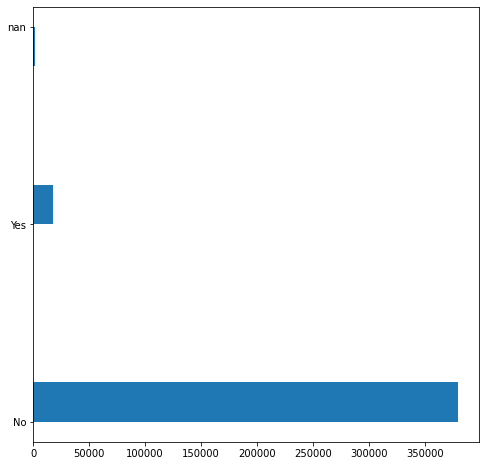

PneumoVaxBool


PneumoVaxBool
No     193848
Yes    137089
Name: count, dtype: int64

0          No
1          No
2         NaN
3         NaN
4         Yes
         ... 
399995     No
399996    Yes
399997    NaN
399998     No
399999    Yes
Name: PneumoVaxBool, Length: 400000, dtype: object

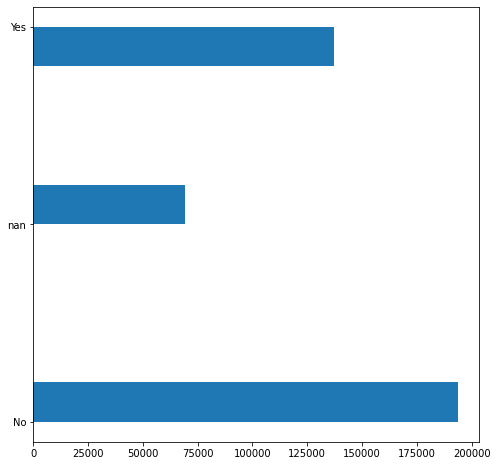

SkinCancerBool


SkinCancerBool
No     365347
Yes     31809
Name: count, dtype: int64

0          No
1          No
2         Yes
3         Yes
4          No
         ... 
399995     No
399996     No
399997     No
399998     No
399999     No
Name: SkinCancerBool, Length: 400000, dtype: object

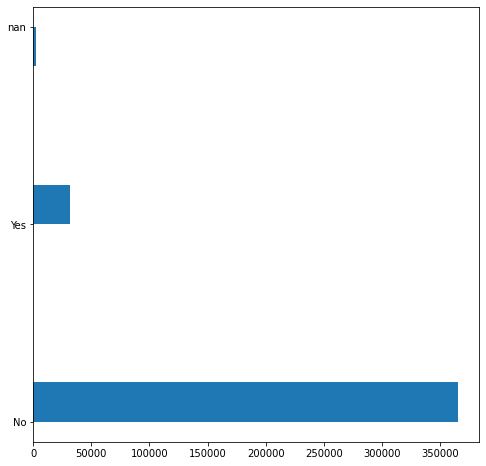

StrokeBool


StrokeBool
No     381359
Yes     17242
Name: count, dtype: int64

0         No
1         No
2         No
3         No
4         No
          ..
399995    No
399996    No
399997    No
399998    No
399999    No
Name: StrokeBool, Length: 400000, dtype: object

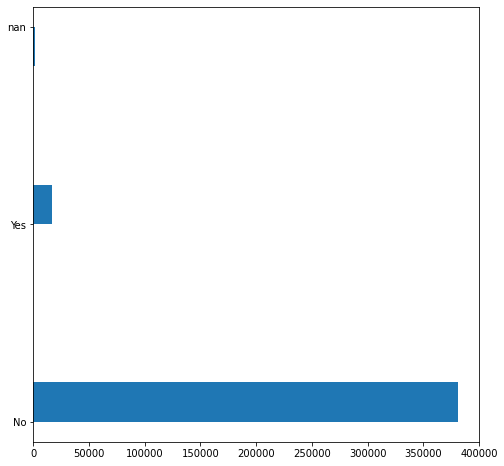

In [5]:
for col in rawData.columns:
    print(col)
    display(rawData[col].value_counts())
    display(rawData[col])
    drawHistorgram(rawData[col])

# --- --- --- --- --- --- --- --- --- --- --- ---

Since the target is the HeartAttackBool column, taking a closer look at that reveals only ~5% of the data set involve heart attacks.

In [6]:
rawData['HeartAttackBool'].value_counts()

HeartAttackBool
No     374722
Yes     22542
Name: count, dtype: int64

In [7]:
len(rawData.loc[rawData['HeartAttackBool'] == 'Yes']) / len(rawData)

0.056355

# --- --- --- --- --- --- --- --- --- --- --- ---

Doing the data cleanup to prepare for a model, the following transformations are being made:
* Dropping all entries with missing data as I lack the knowledge of the dataset to be able to properly handle them, and there are still >200k rows without them to model against
* Breaking apart the columns into numeric columns, boolean columns, and categorical columns, as all can be handled differently
* Transforming age into a numeric column from a categorical one by taking the first two characters
* Transforming Health into a numeric column per the below values
* Converting the Covid column into a CovidBool column by merging the "Yes" and "Yes, home-tested" columns as the test location is not relevant
* Converting the Yes/No to 1.0/0.0 on the boolean columns to make them easier to model with
* We could, but won't here for time, transform the categorical columns into boolean columns using dummy variables/one-hot encoding

0.00 --> Poor

0.25 --> Fair

0.50 -- Good

0.75 --> Very good

1.00 --> Excellent

In [8]:
df2 = rawData.dropna()

In [9]:
df2['Age'] = df2['Age'].apply(lambda x: x[0:2]).astype('float64')

In [10]:
df2['HealthScale'] = np.nan
df2.loc[df2['Health'] == 'Poor', 'HealthScale'] = 0
df2.loc[df2['Health'] == 'Fair', 'HealthScale'] = 0.25
df2.loc[df2['Health'] == 'Good', 'HealthScale'] = 0.5
df2.loc[df2['Health'] == 'Very good', 'HealthScale'] = 0.75
df2.loc[df2['Health'] == 'Excellent', 'HealthScale'] = 1

In [11]:
numCols = list(df2.select_dtypes(include=['float64']).columns)

df2[numCols]

,Age,Height,Weight,BMI,Sleep,PoorPhysical,PoorMental,LastCheckup,HealthScale
0,35.0,1.52,53.52,23.05,8.0,0.0,0.0,1.0,0.75
6,80.0,1.68,77.11,27.44,12.0,0.0,0.0,1.0,0.00
10,60.0,1.83,149.69,44.76,7.0,0.0,0.0,1.0,0.25
11,18.0,1.80,102.06,31.38,5.0,2.0,5.0,2.0,0.50
13,70.0,1.60,79.38,31.00,7.0,0.0,0.0,5.0,0.50
...,...,...,...,...,...,...,...,...,...
399990,25.0,1.70,77.11,26.63,7.0,0.0,2.0,10.0,0.75
399992,50.0,1.70,98.88,34.14,6.0,25.0,2.0,1.0,0.25
399994,60.0,1.78,108.86,34.44,5.0,0.0,0.0,1.0,0.75
399996,75.0,1.73,63.50,21.29,7.0,0.0,0.0,1.0,0.50


In [12]:
df2['CovidBool'] = df2['Covid']
df2.pop('Covid')
df2.loc[df2['CovidBool'] == 'Yes, home-tested', 'CovidBool'] = 'Yes'

In [13]:
boolCols = [x for x in df2.columns if 'Bool' in x]
boolCols2 = [col for col in boolCols if col not in ['HeartAttackBool']]

In [14]:
df2[boolCols] = df2[boolCols].replace('Yes', 1.0)
df2[boolCols] = df2[boolCols].replace('No', 0.0)

df2[boolCols]

,ActiveBool,AlcoholBool,AnginaBool,ArthritisBool,AsthmaBool,ChestScanBool,CopdBool,DepressionBool,DiffConcentratBool,DiffDressingBool,...,HardOfHearingBool,HeartAttackBool,HivRiskBool,HivTestedBool,ImpairedVisionBool,KidneyDiseaseBool,PneumoVaxBool,SkinCancerBool,StrokeBool,CovidBool
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399990,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399992,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
399996,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
catCols = [col for col in df2.columns if col not in numCols + boolCols]
df2[catCols]

,Gender,Ethnicity,Location,Health,Tetanus,TeethRemoved,Smoker,ECigarette,Diabetes
0,Male,"White only, Non-Hispanic",Washington,Very good,No,All,Never,Never,No
6,Male,"Multiracial, Non-Hispanic",Alaska,Poor,"Yes, Tdap",All,Never,Not currently,No
10,Male,"White only, Non-Hispanic",Iowa,Fair,Yes,0,Never,Not currently,No
11,Male,"White only, Non-Hispanic",Utah,Good,No,0,Never,Occasional,No
13,Male,"Multiracial, Non-Hispanic",Hawaii,Good,Yes,5+,Never,Never,"No, borderline"
...,...,...,...,...,...,...,...,...,...
399990,Female,"White only, Non-Hispanic",Missouri,Very good,Yes,0,Never,Never,No
399992,Male,"Other race only, Non-Hispanic",Colorado,Fair,No,0,Quit,Not currently,No
399994,Male,"White only, Non-Hispanic",Ohio,Very good,"Yes, Tdap",All,Never,Never,Yes
399996,Female,"White only, Non-Hispanic",Arizona,Good,Yes,5+,Never,Never,No


# --- --- --- --- --- --- --- --- --- --- --- ---

With the data prepared, we will break the dataset up into 2 groups, with ~80% going for training, and ~20% going for testing. A third category for validation data won't be used.

In [16]:
np.random.seed(1729)

df2['Training'] = np.random.rand(len(df2)) > .2
trainingData = df2.loc[df2['Training']]
testingData = df2.loc[~df2['Training']]

# --- --- --- --- --- --- --- --- --- --- --- ---

Doing a simple logistic regression using the statmodels library will give a pretty table with a lot of information. By doing this we can see that the following columns contributions are likely noise, and can be dropped from the model should we chose to improve it:

* ArthritisBool
* DepressionBool
* DiffDressingBool
* DiffErrandsBool
* CovidBool

In [17]:
modelCols = numCols + boolCols2

In [18]:
# Training

y = trainingData['HeartAttackBool']
X = trainingData[modelCols]

for col in X.columns:
    X[col] = X[col].astype('float64')

X = sm.add_constant(X)

# Testing


yTest = testingData['HeartAttackBool']
XTest = testingData[modelCols]

for col in XTest.columns:
    XTest[col] = XTest[col].astype('float64')

XTest = sm.add_constant(XTest)


In [19]:
results = sm.Logit(y, X).fit()
results.summary()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.148005
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        HeartAttackBool   No. Observations:               177333
Model:                          Logit   Df Residuals:                   177301
Method:                           MLE   Df Model:                           31
Date:                Sat, 31 Jan 2026   Pseudo R-squ.:                  0.3015
Time:                        18:02:04   Log-Likelihood:                -26246.
converged:                       True   LL-Null:                       -37574.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.2037      0.786    -12.977      0.000     -11.745      -8.663
Age  

# --- --- --- --- --- --- --- --- --- --- --- ---

We can further assess the model by looking at how well it predicts both the training data and the testing data. Using the numpy round function sets the threshold at 0.5, however other thresholds could be used if the goal were to intervene on risky populations. The individuals who were predicted to have had a heart attack but did not are a target population for preventative care.

In [20]:
predTrain = np.round(results.predict(X))
predTest = np.round(results.predict(XTest))



In [21]:
resultsTrain = pd.DataFrame()
resultsTrain['Observed'] = y.astype('float64')
resultsTrain['Predicted'] = predTrain

resultsTrain.loc[resultsTrain['Observed'] == 0, 'Observed Result'] = 'No Heart Attack'
resultsTrain.loc[resultsTrain['Observed'] == 1, 'Observed Result'] = 'Heart Attack'

resultsTrain.loc[resultsTrain['Predicted'] == 0, 'Predicted Result'] = 'Predicted No Heart Attack'
resultsTrain.loc[resultsTrain['Predicted'] == 1, 'Predicted Result'] = 'Predicted Heart Attack'

# ~~~

resultsTest = pd.DataFrame()
resultsTest['Observed'] = yTest.astype('float64')
resultsTest['Predicted'] = predTest

resultsTest.loc[resultsTest['Observed'] == 0, 'Observed Result'] = 'No Heart Attack'
resultsTest.loc[resultsTest['Observed'] == 1, 'Observed Result'] = 'Heart Attack'

resultsTest.loc[resultsTest['Predicted'] == 0, 'Predicted Result'] = 'Predicted No Heart Attack'
resultsTest.loc[resultsTest['Predicted'] == 1, 'Predicted Result'] = 'Predicted Heart Attack'

In [22]:
resultsTrain[['Observed Result', 'Predicted Result']].value_counts().to_frame().reset_index()

,Observed Result,Predicted Result,count
0,No Heart Attack,Predicted No Heart Attack,165679
1,Heart Attack,Predicted No Heart Attack,7434
2,Heart Attack,Predicted Heart Attack,2251
3,No Heart Attack,Predicted Heart Attack,1969


<Figure size 432x288 with 0 Axes>

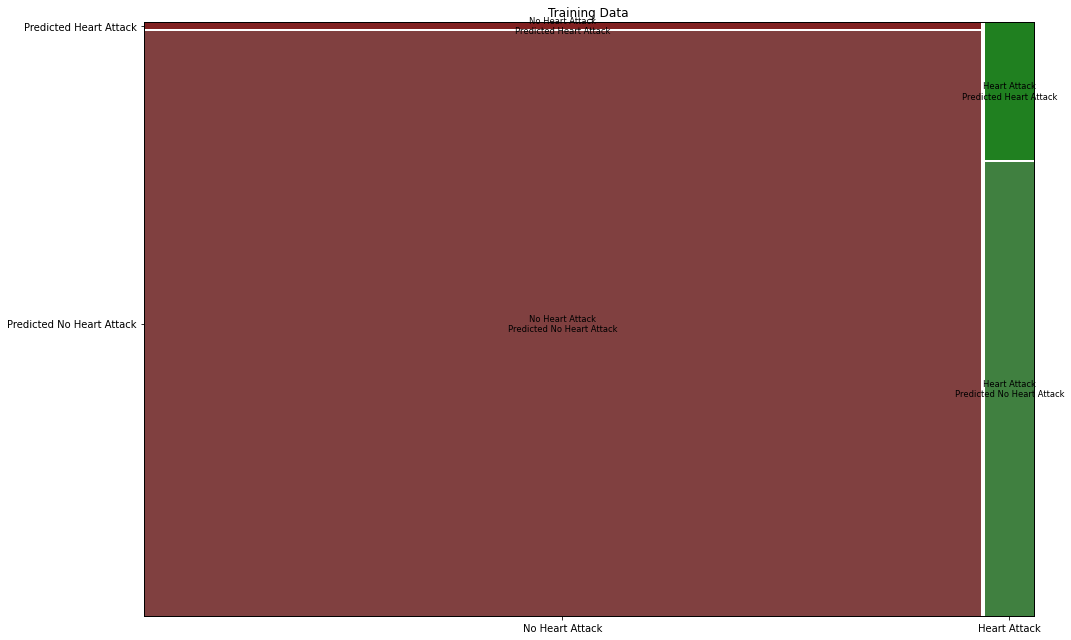

In [23]:
plt.figure()

plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True

mosaic(resultsTrain, ['Observed Result', 'Predicted Result'], title='Training Data')

plt.show()

In [24]:
resultsTest[['Observed Result', 'Predicted Result']].value_counts().to_frame().reset_index()

,Observed Result,Predicted Result,count
0,No Heart Attack,Predicted No Heart Attack,41084
1,Heart Attack,Predicted No Heart Attack,1783
2,Heart Attack,Predicted Heart Attack,584
3,No Heart Attack,Predicted Heart Attack,510


<Figure size 1080x648 with 0 Axes>

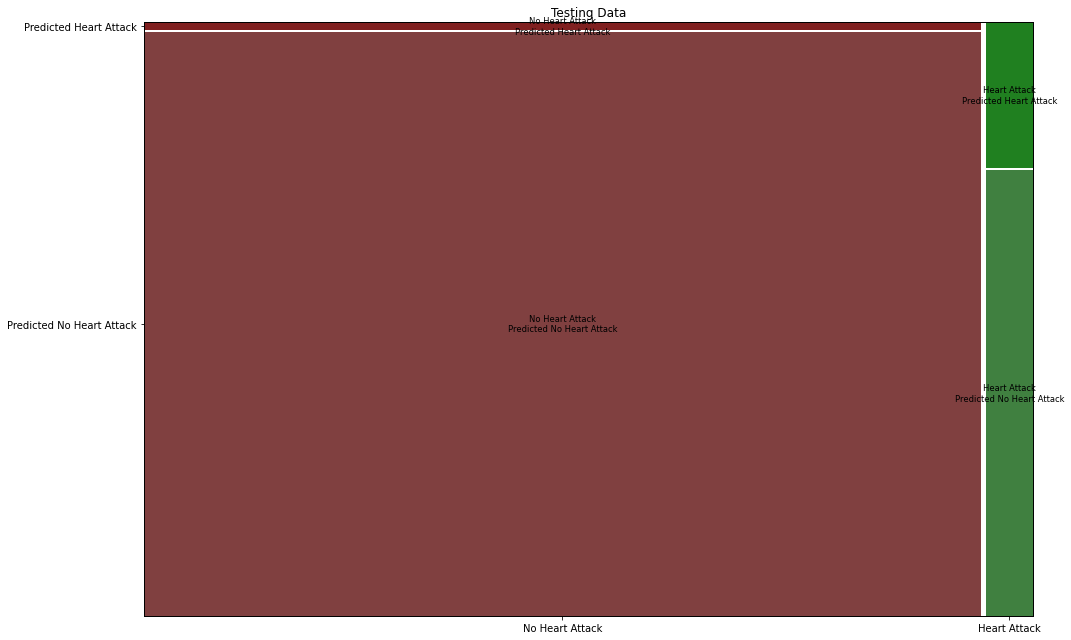

In [25]:
plt.figure()

plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True

mosaic(resultsTest, ['Observed Result', 'Predicted Result'], title='Testing Data')

plt.show()